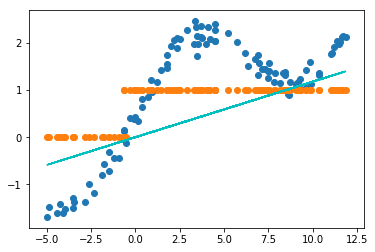

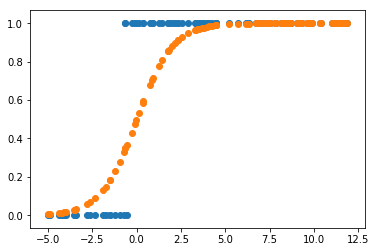

<Figure size 432x288 with 0 Axes>

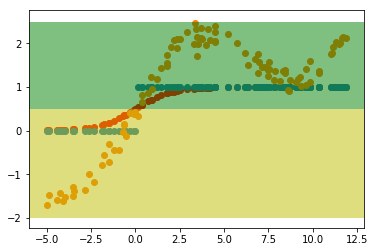

In [156]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
X = pd.read_csv('features.csv'); 
Y = pd.read_csv('labels.csv'); 
Y2 = Y>0; # seperation of y values
plt.figure(1)
plt.scatter(X,Y); # plotting point to point
plt.scatter(X,Y2);
#X = sm.add_constant(X) # runned in a regression with intercept
model = sm.OLS(Y2, X).fit() # ordinary linear regression model
model.summary() # printing the information regarding the regression line
Line = model.predict(X); # obtain prices estimated by the OLS model
plt.plot(X,Line,'c') #drawing regression line
# performing simple logistic regression for classification 
P1 = np.exp(X); 
one = np.ones((100,), dtype=float);
d = pd.DataFrame(one);
P2 = [];
P2 = P1.values[:,0] + d.values[:,0];
P2 = pd.DataFrame(P2);
P = P1.values[:,0]/P2.values[:,0];
plt.figure(2)
plt.scatter(X,Y2);
plt.scatter(X,P);
plt.show();
plt.figure(3)
fig, ax = plt.subplots()
P = pd.DataFrame(P); # the probability of belonging to class1
plt.scatter(X,P,c='r'); # drowing the exponential-based probability 
Y3 = P>0.5; # 0.5 is a threshold for classification
plt.scatter(X,Y3)
# coloring the two distinct regions of classes
ax.axhspan( 0.5, 2.5, facecolor='g', alpha=0.5)
ax.axhspan( -2, 0.5, facecolor='y', alpha=0.5)
plt.scatter(X,Y)
plt.show();

In [150]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 labels   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     99.04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           1.54e-16
Time:                        23:16:07   Log-Likelihood:                -15.344
No. Observations:                 100   AIC:                             34.69
Df Residuals:                      98   BIC:                             39.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5611      0.037     15.059      0.000       0.487       0.635
features       0.0595      0.006      9.952      0.000       0.048       0.071
==============================================================================
Omnibus:                       21.038   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.097
Skew:                          -0.081   Prob(JB):                       0.0782
Kurtosis:                       1.906   Cond. No.                         8.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""